In [ ]:
# scientific computing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# data mining libaries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.decomposition import PCA#, FastICA
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, learning_curve
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE

#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) # to show plots in notebook

# offline plotly
from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')
# change the type of variable
import datetime as dt
######
from tqdm.notebook import tqdm_notebook
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
# Split data in test and train data
from sklearn.model_selection import train_test_split
# Know the significant variable
from sklearn.feature_selection import mutual_info_regression
# Encode the variable in binary
from sklearn.preprocessing import LabelEncoder
# Compute the Z-SCORE
from scipy import stats
###
import statistics
## To Standardize
from sklearn.preprocessing import StandardScaler
# Data preprocessing
from sklearn.utils import shuffle
from sklearn import preprocessing

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
## 
variable_def=pd.read_csv('VariableDefinitions.csv')
variable_def

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


In [ ]:
train=pd.read_csv('Train.csv')

In [ ]:
test=pd.read_csv('Test.csv')

In [ ]:
train.head(4)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


Zscore documentation=https://tobeneo.wordpress.com/2014/08/31/outliers-and-z-score/

In [ ]:
# Check the shape of the train and test sets
print(f'The shape of the train set is: {train.shape}\nThe shape of the test set is: {test.shape}')

The shape of the train set is: (12079, 14)
The shape of the test set is: (1202, 13)


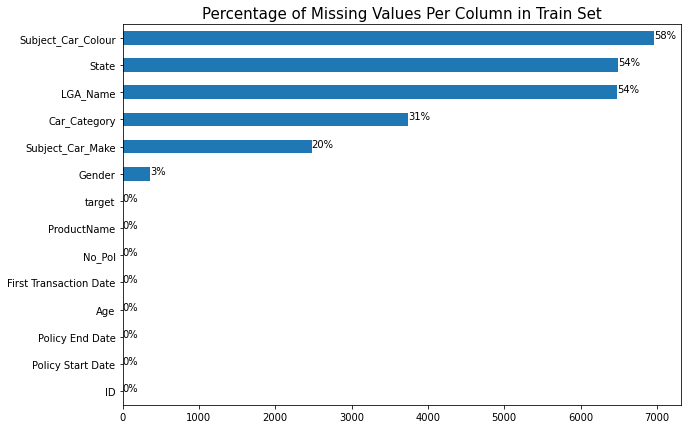

In [ ]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

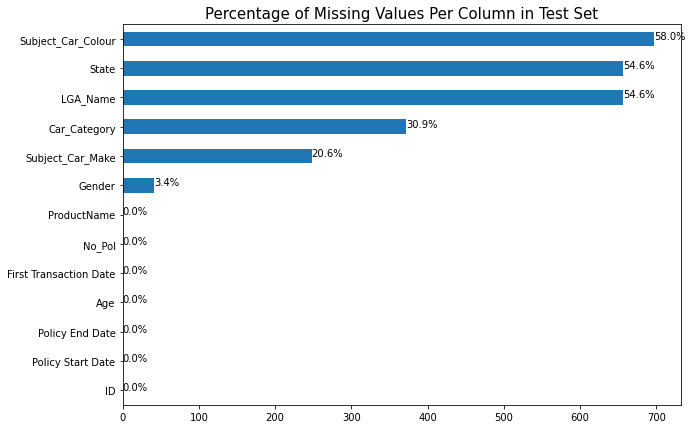

In [ ]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

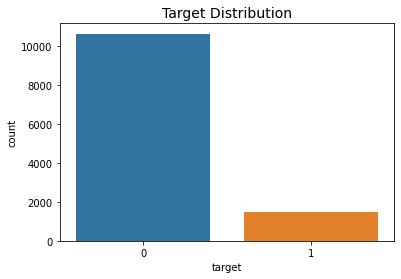

In [ ]:
### Distribution of target variable
sns.countplot(train.target)
plt.title('Target Distribution', fontdict={'size':14});

In [ ]:
train['LGA_Name'].nunique()

258

In [ ]:
test['LGA_Name'].nunique()

193

In [ ]:
train['State'].nunique()

111

In [ ]:
test['State'].nunique()

81

In [ ]:
train['LGA_Name'].nunique()

258

In [ ]:
# Combine train and test set to easily preprocess
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train, test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (17256, 14)


#Exploratory Data Analysis

**1) ONE-DIMENTION**  

In [ ]:
mapper = {'Entity':'Other', 'Joint Gender':'Other', 'NOT STATED':'Other', 'NO GENDER': 'Other', 'SEX':"Other"}
train.Gender = train.Gender.replace(mapper)

# Confirm mappings
train.Gender.value_counts()

Male      7617
Female    3327
Other      776
Name: Gender, dtype: int64

In [ ]:
mapper = {'Entity':'Other', 'Joint Gender':'Other', 'NOT STATED':'Other', 'NO GENDER': 'Other', 'SEX':"Other"}
all_data.Gender = all_data.Gender.replace(mapper)

# Confirm mappings
all_data.Gender.value_counts()

Male      10888
Female     4735
Other      1118
Name: Gender, dtype: int64

Male      7617
Female    3327
Other      776
Name: Gender, dtype: int64


Text(0.5, 0, 'Gender')

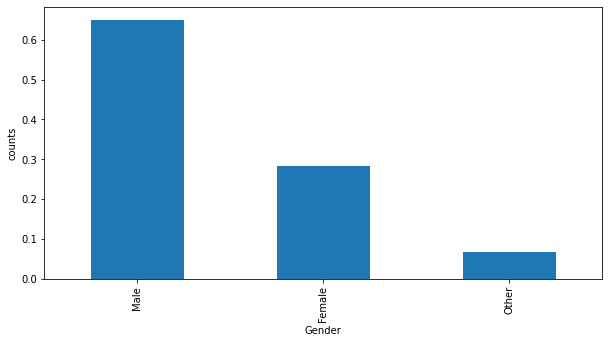

In [ ]:
## gender_of_respondent
print(train['Gender'].value_counts())
plt.figure(figsize=(10,5))
train['Gender'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Gender')

 40      821
 50      628
 41      491
 36      486
 38      472
        ... 
 112       1
 128       1
 90        1
-22        1
-6099      1
Name: Age, Length: 110, dtype: int64


Text(0.5, 0, 'Age')

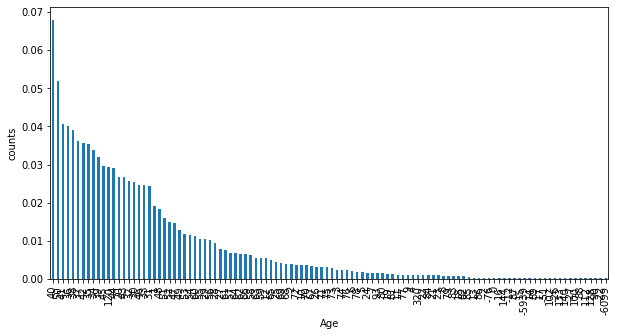

In [ ]:
## Age of insured

print(train['Age'].value_counts())
plt.figure(figsize=(10,5))
train['Age'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Age')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [ ]:
def convert_to_date(data):
  # Change each column to its appriopriate datatype
  date_cols = [col for col in data.columns if 'Date' in col]
  num_cols = ['Age', 'No_Pol']
  cat_cols = [col for col in data.columns if col not in date_cols+num_cols+['ID', 'target']]

  for col in data.columns:
    if col in date_cols:
      data[col] = pd.to_datetime(data[col])
    elif col in cat_cols:
      data[col] = data[col].astype('category')
  return data

In [ ]:
all_data=convert_to_date(all_data)

In [ ]:
"""train=convert_to_date(train)
test=convert_to_date(test)"""

In [ ]:
all_data.shape

(17256, 14)

In [ ]:
train.shape

(12079, 14)

In [ ]:
train['ID'].nunique()

12079

In [ ]:
test.shape

(5177, 13)

Car Classic         6485
CarSafe             3774
Customized Motor     545
Car Plus             486
CVTP                 469
CarFlex              176
Muuve                 93
Motor Cycle           46
Car Vintage            5
Name: ProductName, dtype: int64


Text(0.5, 0, 'ProductName')

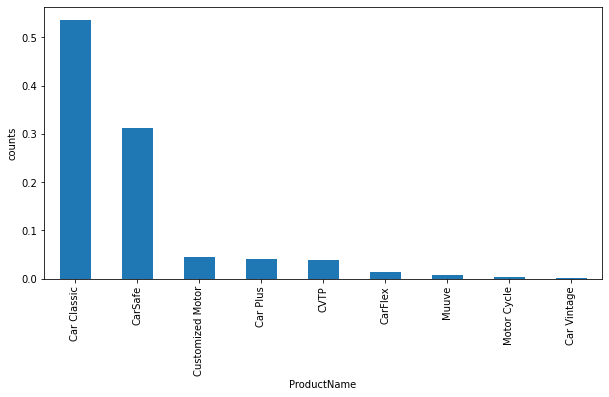

In [ ]:
# visualize ProductName
print(train['ProductName'].value_counts())
plt.figure(figsize=(10,5))
train['ProductName'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('ProductName')

Victoria Island    1162
Ikeja               401
Surulere            288
Abuja Municipal     232
Lagos Mainland      222
                   ... 
Katcha                1
Kano                  1
EFFURUN               1
EMENE                 1
kumbotso              1
Name: LGA_Name, Length: 258, dtype: int64


Text(0.5, 0, 'LGA_Name')

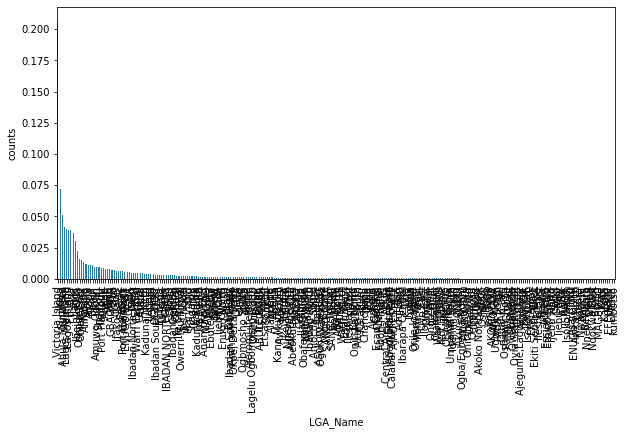

In [ ]:
# visualize 
print(train['LGA_Name'].value_counts())
plt.figure(figsize=(10,5))
train['LGA_Name'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('LGA_Name')

**2) TWO-DIMENSION**

Gender


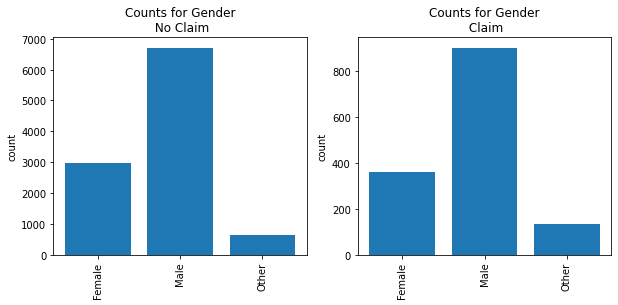

Car_Category


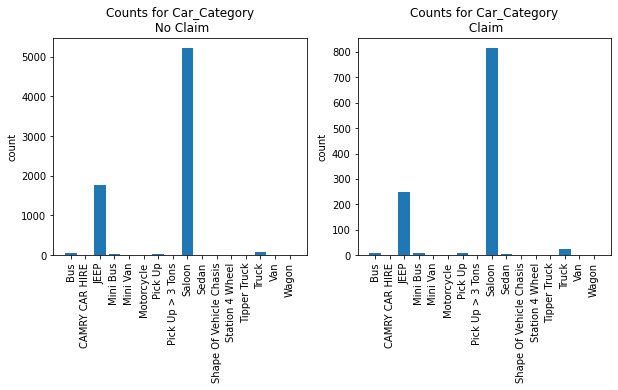

Subject_Car_Colour


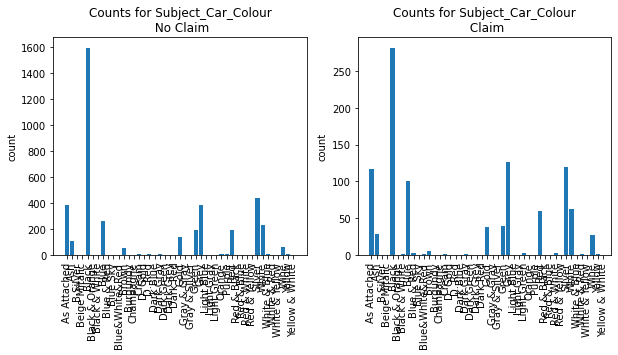

Subject_Car_Make


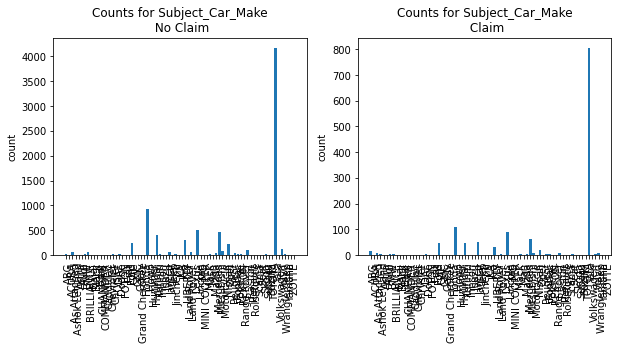

LGA_Name


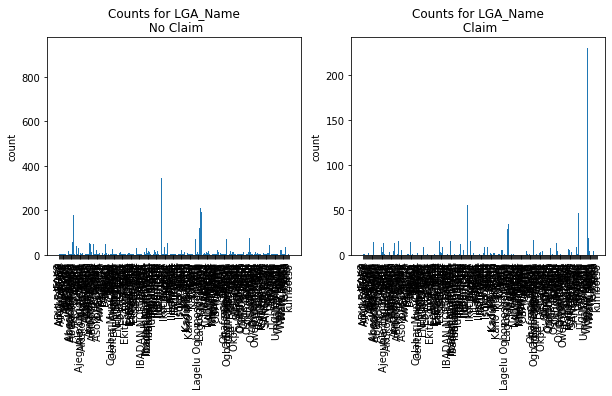

State


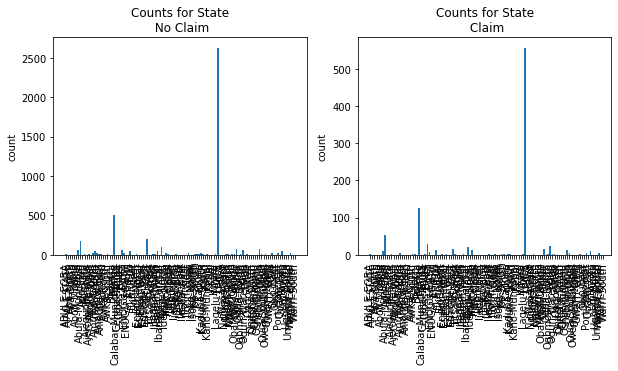

ProductName


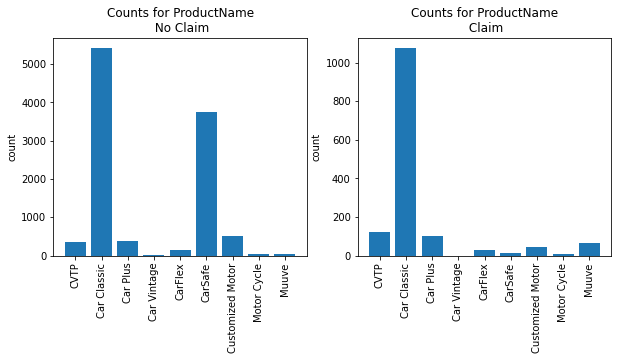

In [ ]:
### Only categorical variables and target
import numpy as np
cat_cols = ['Gender', 'Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 
                  'LGA_Name', 'State', 'ProductName']

train['dummy'] = np.ones(shape = train.shape[0])
for col in cat_cols:
    print(col)
    counts = train[['dummy', 'target', col]].groupby(['target', col], as_index = False).count()
    temp = counts[counts['target'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['target'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n No Claim')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['target'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Claim')
    plt.ylabel('count')
    plt.show()

# Data Preprocessing

###Since the data have many categorical variables, we need to do data processing. 

##  The following function  *prepare_data()* will be used for data processing and feature engineering.

In [ ]:
date_cols = [col for col in all_data.columns if 'Date' in col]
num_cols = ['Age', 'No_Pol']
cat_cols = [col for col in all_data.columns if col not in date_cols+num_cols+['ID', 'target']]

In [ ]:
# Fill in missing values
# For cat cols and date cols fill in with mode and for num cols fill in with 9999
for col in all_data.columns:
  if col in date_cols+cat_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
  elif col in num_cols:
    all_data[col] = all_data[col].fillna(all_data[col].fillna(9999))

# Confirm that there aren't any missing values
all_data[all_data.columns.difference(['target'])].isna().sum()

Age                       0
Car_Category              0
First Transaction Date    0
Gender                    0
ID                        0
LGA_Name                  0
No_Pol                    0
Policy End Date           0
Policy Start Date         0
ProductName               0
State                     0
Subject_Car_Colour        0
Subject_Car_Make          0
dtype: int64

In [ ]:
all_data=all_data.drop(['First Transaction Date'],axis=1)

In [ ]:
def kady_prepare(data):
  date_cols = [col for col in data.columns if 'Date' in col]
  data = pd.get_dummies(data, columns=['Gender','State', 'Car_Category','LGA_Name', 'ProductName','Subject_Car_Colour'])
  #data = data.drop("ID", axis=1)
  #normalizing the Age variable
  data['Age']=np.log10(data['Age'])
  for col in date_cols:
    for date_feature in ['year', 'month', 'day']:
      data[col+date_feature] = getattr(data[col].dt, date_feature)
  #data =data.drop(['ID','Subject_Car_Make','Policy Start Date','Policy End Date'],axis=1)
  data['Policy Start Dateyear']=np.log10(data['Policy Start Dateyear'])
  data['Policy Start Datemonth']=np.log10(data['Policy Start Datemonth'])
  data['Policy Start Dateday']=np.log10(data['Policy Start Dateday'])
  data['Policy End Dateyear']=np.log10(data['Policy End Dateyear'])
  data['Policy End Datemonth']=np.log10(data['Policy End Datemonth'])
  data['Policy End Dateday']=np.log10(data['Policy End Dateday'])
  return data

In [ ]:
all_data=kady_prepare(all_data)
all_data =all_data.drop(['ID','Subject_Car_Make','Policy Start Date','Policy End Date'],axis=1)


In [ ]:
all_data.shape

(17256, 354)

In [ ]:
all_data.head()

,Age,No_Pol,target,Gender_Female,Gender_Male,Gender_Other,State_ABULE-EGBA,State_AJAO-ESTATE,State_Aba-North,State_Aba-South,State_Abia,State_Aboh-Mbaise,State_Abuja,State_Abuja-Municipal,State_Ado-Ekiti,State_Ado-Ota,State_Ajegunle-State,State_Ajeromi-Ifelodun,State_Akoko-West,State_Akwa-Ibom,State_Amuwo-Odofin,State_Anambra,State_Anambra-East,State_Aniocha-South,State_Asari-Toru,State_Awka-North,State_Awka-South,State_Bauchi,State_Bayelsa,State_Benue,State_Calabar-Municipality,State_Central-Abuja,State_Cross-River,State_Delta,State_ENUGU-EAST,State_ENUGU-SOUTH,State_Ebonyi,State_Edo,State_Ekiti-East,State_Ekiti-West,...,Subject_Car_Colour_Burgundy,Subject_Car_Colour_Champagne,Subject_Car_Colour_Cream,Subject_Car_Colour_D. Gold,Subject_Car_Colour_D. Red,Subject_Car_Colour_Dark Blue,Subject_Car_Colour_Dark Gray,Subject_Car_Colour_Dark Green,Subject_Car_Colour_Dark Grey,Subject_Car_Colour_Dark Red,Subject_Car_Colour_Gold,Subject_Car_Colour_Gray & Gray,Subject_Car_Colour_Gray & Silver,Subject_Car_Colour_Green,Subject_Car_Colour_Grey,Subject_Car_Colour_Light Blue,Subject_Car_Colour_Light Gray,Subject_Car_Colour_Light Green,Subject_Car_Colour_Orange,Subject_Car_Colour_Purple,Subject_Car_Colour_Red,Subject_Car_Colour_Red & Black,Subject_Car_Colour_Red & Blue,Subject_Car_Colour_Red & White,Subject_Car_Colour_Red & Yellow,Subject_Car_Colour_Red Maroon,Subject_Car_Colour_Silver,Subject_Car_Colour_White,Subject_Car_Colour_White & Blue,Subject_Car_Colour_White & Red,Subject_Car_Colour_White & Yellow,Subject_Car_Colour_Wine,Subject_Car_Colour_Yellow,Subject_Car_Colour_Yellow & White,Policy Start Dateyear,Policy Start Datemonth,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Dateday
0,1.477121,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.303196,0.698970,1.146128,3.303412,0.698970,1.113943
1,1.897627,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.303196,1.041393,1.462398,3.303412,1.041393,1.447158
2,1.633468,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.303196,0.477121,1.322219,3.303412,0.477121,1.301030
3,0.301030,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.303196,0.903090,1.322219,3.303412,0.903090,1.301030
4,1.301030,3,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.303196,0.903090,1.462398,3.303196,1.079181,1.491362


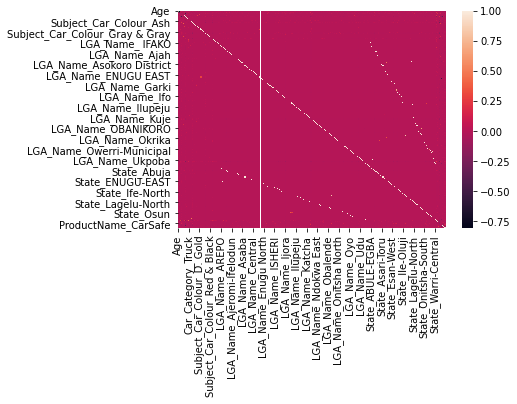

In [ ]:
# check correlation between variables
corr = l.corr()
ax = sns.heatmap(
    corr)

# Data Preprocessing

In [ ]:
all_data = all_data.astype(float)

In [ ]:
#all_data = all_data.reset_index()

In [ ]:
"""#import pandas as pd
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)"""

In [ ]:
#all_data=clean_dataset(all_data)

In [ ]:
all_data.head(4)

,Age,No_Pol,target,Gender_Female,Gender_Male,Gender_Other,State_ABULE-EGBA,State_AJAO-ESTATE,State_Aba-North,State_Aba-South,State_Abia,State_Aboh-Mbaise,State_Abuja,State_Abuja-Municipal,State_Ado-Ekiti,State_Ado-Ota,State_Ajegunle-State,State_Ajeromi-Ifelodun,State_Akoko-West,State_Akwa-Ibom,State_Amuwo-Odofin,State_Anambra,State_Anambra-East,State_Aniocha-South,State_Asari-Toru,State_Awka-North,State_Awka-South,State_Bauchi,State_Bayelsa,State_Benue,State_Calabar-Municipality,State_Central-Abuja,State_Cross-River,State_Delta,State_ENUGU-EAST,State_ENUGU-SOUTH,State_Ebonyi,State_Edo,State_Ekiti-East,State_Ekiti-West,...,Subject_Car_Colour_Burgundy,Subject_Car_Colour_Champagne,Subject_Car_Colour_Cream,Subject_Car_Colour_D. Gold,Subject_Car_Colour_D. Red,Subject_Car_Colour_Dark Blue,Subject_Car_Colour_Dark Gray,Subject_Car_Colour_Dark Green,Subject_Car_Colour_Dark Grey,Subject_Car_Colour_Dark Red,Subject_Car_Colour_Gold,Subject_Car_Colour_Gray & Gray,Subject_Car_Colour_Gray & Silver,Subject_Car_Colour_Green,Subject_Car_Colour_Grey,Subject_Car_Colour_Light Blue,Subject_Car_Colour_Light Gray,Subject_Car_Colour_Light Green,Subject_Car_Colour_Orange,Subject_Car_Colour_Purple,Subject_Car_Colour_Red,Subject_Car_Colour_Red & Black,Subject_Car_Colour_Red & Blue,Subject_Car_Colour_Red & White,Subject_Car_Colour_Red & Yellow,Subject_Car_Colour_Red Maroon,Subject_Car_Colour_Silver,Subject_Car_Colour_White,Subject_Car_Colour_White & Blue,Subject_Car_Colour_White & Red,Subject_Car_Colour_White & Yellow,Subject_Car_Colour_Wine,Subject_Car_Colour_Yellow,Subject_Car_Colour_Yellow & White,Policy Start Dateyear,Policy Start Datemonth,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Dateday
0,1.477121,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,0.698970,1.146128,3.303412,0.698970,1.113943
1,1.897627,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,1.041393,1.462398,3.303412,1.041393,1.447158
2,1.633468,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,0.477121,1.322219,3.303412,0.477121,1.301030
3,0.301030,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,0.903090,1.322219,3.303412,0.903090,1.301030


In [ ]:
all_data.dtypes

Age                       float64
No_Pol                    float64
target                    float64
Gender_Female             float64
Gender_Male               float64
                           ...   
Policy Start Datemonth    float64
Policy Start Dateday      float64
Policy End Dateyear       float64
Policy End Datemonth      float64
Policy End Dateday        float64
Length: 353, dtype: object

In [ ]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((12079, 466), (5177, 466))

In [ ]:
train_df.head()

,Age,No_Pol,target,Gender_Female,Gender_Male,Gender_Other,State_ABULE-EGBA,State_AJAO-ESTATE,State_Aba-North,State_Aba-South,State_Abia,State_Aboh-Mbaise,State_Abuja,State_Abuja-Municipal,State_Ado-Ekiti,State_Ado-Ota,State_Ajegunle-State,State_Ajeromi-Ifelodun,State_Akoko-West,State_Akwa-Ibom,State_Amuwo-Odofin,State_Anambra,State_Anambra-East,State_Aniocha-South,State_Asari-Toru,State_Awka-North,State_Awka-South,State_Bauchi,State_Bayelsa,State_Benue,State_Calabar-Municipality,State_Central-Abuja,State_Cross-River,State_Delta,State_ENUGU-EAST,State_ENUGU-SOUTH,State_Ebonyi,State_Edo,State_Ekiti-East,State_Ekiti-West,...,Subject_Car_Colour_Burgundy,Subject_Car_Colour_Champagne,Subject_Car_Colour_Cream,Subject_Car_Colour_D. Gold,Subject_Car_Colour_D. Red,Subject_Car_Colour_Dark Blue,Subject_Car_Colour_Dark Gray,Subject_Car_Colour_Dark Green,Subject_Car_Colour_Dark Grey,Subject_Car_Colour_Dark Red,Subject_Car_Colour_Gold,Subject_Car_Colour_Gray & Gray,Subject_Car_Colour_Gray & Silver,Subject_Car_Colour_Green,Subject_Car_Colour_Grey,Subject_Car_Colour_Light Blue,Subject_Car_Colour_Light Gray,Subject_Car_Colour_Light Green,Subject_Car_Colour_Orange,Subject_Car_Colour_Purple,Subject_Car_Colour_Red,Subject_Car_Colour_Red & Black,Subject_Car_Colour_Red & Blue,Subject_Car_Colour_Red & White,Subject_Car_Colour_Red & Yellow,Subject_Car_Colour_Red Maroon,Subject_Car_Colour_Silver,Subject_Car_Colour_White,Subject_Car_Colour_White & Blue,Subject_Car_Colour_White & Red,Subject_Car_Colour_White & Yellow,Subject_Car_Colour_Wine,Subject_Car_Colour_Yellow,Subject_Car_Colour_Yellow & White,Policy Start Dateyear,Policy Start Datemonth,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Dateday
0,1.477121,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,0.698970,1.146128,3.303412,0.698970,1.113943
1,1.897627,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,1.041393,1.462398,3.303412,1.041393,1.447158
2,1.633468,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,0.477121,1.322219,3.303412,0.477121,1.301030
3,0.301030,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,0.903090,1.322219,3.303412,0.903090,1.301030
4,1.301030,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,0.903090,1.462398,3.303196,1.079181,1.491362


In [ ]:
test_df.head()

,Age,No_Pol,target,Gender_Female,Gender_Male,Gender_Other,State_ABULE-EGBA,State_AJAO-ESTATE,State_Aba-North,State_Aba-South,State_Abia,State_Aboh-Mbaise,State_Abuja,State_Abuja-Municipal,State_Ado-Ekiti,State_Ado-Ota,State_Ajegunle-State,State_Ajeromi-Ifelodun,State_Akoko-West,State_Akwa-Ibom,State_Amuwo-Odofin,State_Anambra,State_Anambra-East,State_Aniocha-South,State_Asari-Toru,State_Awka-North,State_Awka-South,State_Bauchi,State_Bayelsa,State_Benue,State_Calabar-Municipality,State_Central-Abuja,State_Cross-River,State_Delta,State_ENUGU-EAST,State_ENUGU-SOUTH,State_Ebonyi,State_Edo,State_Ekiti-East,State_Ekiti-West,...,Subject_Car_Colour_Burgundy,Subject_Car_Colour_Champagne,Subject_Car_Colour_Cream,Subject_Car_Colour_D. Gold,Subject_Car_Colour_D. Red,Subject_Car_Colour_Dark Blue,Subject_Car_Colour_Dark Gray,Subject_Car_Colour_Dark Green,Subject_Car_Colour_Dark Grey,Subject_Car_Colour_Dark Red,Subject_Car_Colour_Gold,Subject_Car_Colour_Gray & Gray,Subject_Car_Colour_Gray & Silver,Subject_Car_Colour_Green,Subject_Car_Colour_Grey,Subject_Car_Colour_Light Blue,Subject_Car_Colour_Light Gray,Subject_Car_Colour_Light Green,Subject_Car_Colour_Orange,Subject_Car_Colour_Purple,Subject_Car_Colour_Red,Subject_Car_Colour_Red & Black,Subject_Car_Colour_Red & Blue,Subject_Car_Colour_Red & White,Subject_Car_Colour_Red & Yellow,Subject_Car_Colour_Red Maroon,Subject_Car_Colour_Silver,Subject_Car_Colour_White,Subject_Car_Colour_White & Blue,Subject_Car_Colour_White & Red,Subject_Car_Colour_White & Yellow,Subject_Car_Colour_Wine,Subject_Car_Colour_Yellow,Subject_Car_Colour_Yellow & White,Policy Start Dateyear,Policy Start Datemonth,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Dateday
12079,1.397940,1.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,0.602060,1.380211,3.303412,0.477121,1.431364
12080,2.079181,4.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,0.000000,0.000000,3.303196,1.079181,1.491362
12081,1.662758,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,1.000000,1.361728,3.303412,1.000000,1.342423
12082,1.505150,1.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,1.000000,1.146128,3.303412,1.000000,1.113943
12083,2.079181,4.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,0.954243,1.204120,3.303196,1.079181,1.491362


In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
train_clean=clean_dataset(train_df)

In [ ]:
train_df=pd.DataFrame(train_clean)
train_df.head(4)

,Age,No_Pol,target,Gender_Female,Gender_Male,Gender_Other,State_ABULE-EGBA,State_AJAO-ESTATE,State_Aba-North,State_Aba-South,State_Abia,State_Aboh-Mbaise,State_Abuja,State_Abuja-Municipal,State_Ado-Ekiti,State_Ado-Ota,State_Ajegunle-State,State_Ajeromi-Ifelodun,State_Akoko-West,State_Akwa-Ibom,State_Amuwo-Odofin,State_Anambra,State_Anambra-East,State_Aniocha-South,State_Asari-Toru,State_Awka-North,State_Awka-South,State_Bauchi,State_Bayelsa,State_Benue,State_Calabar-Municipality,State_Central-Abuja,State_Cross-River,State_Delta,State_ENUGU-EAST,State_ENUGU-SOUTH,State_Ebonyi,State_Edo,State_Ekiti-East,State_Ekiti-West,...,Subject_Car_Colour_Burgundy,Subject_Car_Colour_Champagne,Subject_Car_Colour_Cream,Subject_Car_Colour_D. Gold,Subject_Car_Colour_D. Red,Subject_Car_Colour_Dark Blue,Subject_Car_Colour_Dark Gray,Subject_Car_Colour_Dark Green,Subject_Car_Colour_Dark Grey,Subject_Car_Colour_Dark Red,Subject_Car_Colour_Gold,Subject_Car_Colour_Gray & Gray,Subject_Car_Colour_Gray & Silver,Subject_Car_Colour_Green,Subject_Car_Colour_Grey,Subject_Car_Colour_Light Blue,Subject_Car_Colour_Light Gray,Subject_Car_Colour_Light Green,Subject_Car_Colour_Orange,Subject_Car_Colour_Purple,Subject_Car_Colour_Red,Subject_Car_Colour_Red & Black,Subject_Car_Colour_Red & Blue,Subject_Car_Colour_Red & White,Subject_Car_Colour_Red & Yellow,Subject_Car_Colour_Red Maroon,Subject_Car_Colour_Silver,Subject_Car_Colour_White,Subject_Car_Colour_White & Blue,Subject_Car_Colour_White & Red,Subject_Car_Colour_White & Yellow,Subject_Car_Colour_Wine,Subject_Car_Colour_Yellow,Subject_Car_Colour_Yellow & White,Policy Start Dateyear,Policy Start Datemonth,Policy Start Dateday,Policy End Dateyear,Policy End Datemonth,Policy End Dateday
0,1.477121,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,0.698970,1.146128,3.303412,0.698970,1.113943
1,1.897627,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,1.041393,1.462398,3.303412,1.041393,1.447158
2,1.633468,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,0.477121,1.322219,3.303412,0.477121,1.301030
3,0.301030,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303196,0.903090,1.322219,3.303412,0.903090,1.301030


In [ ]:
#  Select main columns to be used in training
main_cols = all_data.columns.difference(date_cols+['ID', 'target'])
x = train_df[main_cols]
y =train_df.target

# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Train model
#model = LGBMClassifier()
#model.fit(X_train, y_train)

# Make predictions
#y_pred = model.predict(X_test)

# Check the f1 score of the model
#print(f'F1 score on the X_test is: {f1_score(y_test, y_pred)}')

In [ ]:
#y = train_df['target']
#x = train_df.drop(['target'], axis=1)

In [ ]:
# Perform test train split
x_train , x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(x_train), columns=x_train.columns)
X_val_scaled = pd.DataFrame(mms.transform(x_val), columns=x_val.columns)
# we have now fit and transform the data into a scaler for accurate reading and results.

In [ ]:
X_scaled.head(2)

,Age,Car_Category_Bus,Car_Category_CAMRY CAR HIRE,Car_Category_JEEP,Car_Category_Mini Bus,Car_Category_Mini Van,Car_Category_Motorcycle,Car_Category_Pick Up,Car_Category_Pick Up > 3 Tons,Car_Category_Saloon,Car_Category_Sedan,Car_Category_Shape Of Vehicle Chasis,Car_Category_Station 4 Wheel,Car_Category_Tipper Truck,Car_Category_Truck,Car_Category_Van,Car_Category_Wagon,Gender_Female,Gender_Male,Gender_Other,LGA_Name_ IFAKO,LGA_Name_ABULE EGBA,LGA_Name_AGBARA,LGA_Name_AJAO ESTATE,LGA_Name_AKOKO-EDO,LGA_Name_AKOWONJO,LGA_Name_AKUTE,LGA_Name_ALAPERE,LGA_Name_AREPO,LGA_Name_AWOYAYA,LGA_Name_Aba North,LGA_Name_Aba South,LGA_Name_Abakaliki,LGA_Name_Abeokuta,LGA_Name_Abeokuta North,LGA_Name_Abeokuta South,LGA_Name_Aboh-Mbaise,LGA_Name_Abuja,LGA_Name_Abuja Municipal,LGA_Name_Ado-Ekiti,...,Subject_Car_Colour_Black & White,Subject_Car_Colour_Blue,Subject_Car_Colour_Blue & Red,Subject_Car_Colour_Blue Sky,Subject_Car_Colour_Blue&White&Red,Subject_Car_Colour_Brown,Subject_Car_Colour_Burgundy,Subject_Car_Colour_Champagne,Subject_Car_Colour_Cream,Subject_Car_Colour_D. Gold,Subject_Car_Colour_D. Red,Subject_Car_Colour_Dark Blue,Subject_Car_Colour_Dark Gray,Subject_Car_Colour_Dark Green,Subject_Car_Colour_Dark Grey,Subject_Car_Colour_Dark Red,Subject_Car_Colour_Gold,Subject_Car_Colour_Gray & Gray,Subject_Car_Colour_Gray & Silver,Subject_Car_Colour_Green,Subject_Car_Colour_Grey,Subject_Car_Colour_Light Blue,Subject_Car_Colour_Light Gray,Subject_Car_Colour_Light Green,Subject_Car_Colour_Orange,Subject_Car_Colour_Purple,Subject_Car_Colour_Red,Subject_Car_Colour_Red & Black,Subject_Car_Colour_Red & Blue,Subject_Car_Colour_Red & White,Subject_Car_Colour_Red & Yellow,Subject_Car_Colour_Red Maroon,Subject_Car_Colour_Silver,Subject_Car_Colour_White,Subject_Car_Colour_White & Blue,Subject_Car_Colour_White & Red,Subject_Car_Colour_White & Yellow,Subject_Car_Colour_Wine,Subject_Car_Colour_Yellow,Subject_Car_Colour_Yellow & White
0,0.743797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.659926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# test set
test_df = test_df[main_cols]

In [ ]:
X_scaled_test = pd.DataFrame(mms.fit_transform(test_df), columns=test_df.columns)

In [ ]:
X_scaled_test.head(2)

,Age,Car_Category_Bus,Car_Category_CAMRY CAR HIRE,Car_Category_JEEP,Car_Category_Mini Bus,Car_Category_Mini Van,Car_Category_Motorcycle,Car_Category_Pick Up,Car_Category_Pick Up > 3 Tons,Car_Category_Saloon,Car_Category_Sedan,Car_Category_Shape Of Vehicle Chasis,Car_Category_Station 4 Wheel,Car_Category_Tipper Truck,Car_Category_Truck,Car_Category_Van,Car_Category_Wagon,Gender_Female,Gender_Male,Gender_Other,LGA_Name_ IFAKO,LGA_Name_ABULE EGBA,LGA_Name_AGBARA,LGA_Name_AJAO ESTATE,LGA_Name_AKOKO-EDO,LGA_Name_AKOWONJO,LGA_Name_AKUTE,LGA_Name_ALAPERE,LGA_Name_AREPO,LGA_Name_AWOYAYA,LGA_Name_Aba North,LGA_Name_Aba South,LGA_Name_Abakaliki,LGA_Name_Abeokuta,LGA_Name_Abeokuta North,LGA_Name_Abeokuta South,LGA_Name_Aboh-Mbaise,LGA_Name_Abuja,LGA_Name_Abuja Municipal,LGA_Name_Ado-Ekiti,...,Subject_Car_Colour_Black & White,Subject_Car_Colour_Blue,Subject_Car_Colour_Blue & Red,Subject_Car_Colour_Blue Sky,Subject_Car_Colour_Blue&White&Red,Subject_Car_Colour_Brown,Subject_Car_Colour_Burgundy,Subject_Car_Colour_Champagne,Subject_Car_Colour_Cream,Subject_Car_Colour_D. Gold,Subject_Car_Colour_D. Red,Subject_Car_Colour_Dark Blue,Subject_Car_Colour_Dark Gray,Subject_Car_Colour_Dark Green,Subject_Car_Colour_Dark Grey,Subject_Car_Colour_Dark Red,Subject_Car_Colour_Gold,Subject_Car_Colour_Gray & Gray,Subject_Car_Colour_Gray & Silver,Subject_Car_Colour_Green,Subject_Car_Colour_Grey,Subject_Car_Colour_Light Blue,Subject_Car_Colour_Light Gray,Subject_Car_Colour_Light Green,Subject_Car_Colour_Orange,Subject_Car_Colour_Purple,Subject_Car_Colour_Red,Subject_Car_Colour_Red & Black,Subject_Car_Colour_Red & Blue,Subject_Car_Colour_Red & White,Subject_Car_Colour_Red & Yellow,Subject_Car_Colour_Red Maroon,Subject_Car_Colour_Silver,Subject_Car_Colour_White,Subject_Car_Colour_White & Blue,Subject_Car_Colour_White & Red,Subject_Car_Colour_White & Yellow,Subject_Car_Colour_Wine,Subject_Car_Colour_Yellow,Subject_Car_Colour_Yellow & White
0,0.558026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.829963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#date_co = [col for col in X_scaled_test.columns]
#date_co

In [ ]:
#S_test = X_scaled_test.set_axis(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194','f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194'],axis=1)

In [48]:
S_test = X_scaled_test.set_axis(['f'+str(i) for i in range(465)], axis =1)

In [49]:
S_test.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464
0,0.558026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.829963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# saving the dataframe
X_scaled_test.to_csv('my_test.csv')

In [51]:
X_balanced, y_balanced = oversample.fit_resample(x_train, y_train)
#X_test_balanced, y_test_balanced = oversample.fit_resample(x_val, y_val)
# we have addressed the issue of oversampling here

In [53]:
b=pd.DataFrame(X_balanced)
b.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464
0,1.863323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.653213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
X_test_balanced, y_test_balanced = oversample.fit_resample(x_val, y_val)

In [55]:
y_train.value_counts()

0.0    8484
1.0    1164
Name: target, dtype: int64

In [56]:
a=pd.DataFrame(y_balanced)

In [57]:
a.value_counts()

1.0    8484
0.0    8484
dtype: int64

# Machine Learning Model

In [ ]:
#Split training data into train and test split
#x_train, y_train, x_test, y_test, _ = prepare_data()

**Oversampling** = It is when we increase  the smaller class.


**Undersampling** = It is when we decrease  the bigger class.

In [58]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

In [59]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_score = classifier.score(X_balanced, y_balanced)
    train_scores.append(train_score)
    test_score = classifier.score(X_test_balanced, y_test_balanced)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.7384488448844885, 0.8801862329090052, 0.7464639321074965, 0.9742456388495992, 0.9742456388495992, 0.8592055634134842]
[0.7185882352941176, 0.6792941176470588, 0.7411764705882353, 0.8345882352941176, 0.8056470588235294, 0.8583529411764705]


 -  We found out that XGBoost model is performing best on the train set as well as test set with 85% accuracy
 
- We will be using XGBoost to predict our values.

In [61]:
xgb = XGBClassifier()
model = xgb.fit(X_balanced, y_balanced)
prediction = xgb.predict(X_test_balanced)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced, prediction))

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      2125
         1.0       0.82      0.92      0.87      2125

    accuracy                           0.86      4250
   macro avg       0.86      0.86      0.86      4250
weighted avg       0.86      0.86      0.86      4250



## Making predictions of the test set and creating a submission file

In [63]:
ss = pd.read_csv('SampleSubmission.csv')

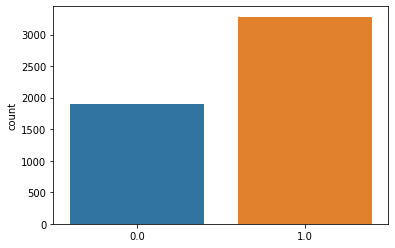

In [64]:
predictions = xgb.predict(S_test)
# Create a submission file
sub_file = ss.copy()
sub_file.predictions = predictions

# Check the distribution of your predictions
sns.countplot(sub_file.predictions);